In [2]:
%load_ext autoreload
%autoreload 2

from src import detect_faces, show_bboxes
from PIL import Image
import cv2
import numpy as np
from src.align_trans import get_reference_facial_points, warp_and_crop_face

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
img = Image.open('/mnt/NAS/home/weicheng/selfLearning/facenet/project/lfw/lfw-py/lfw_funneled/Aaron_Patterson/Aaron_Guiel_0001.jpg')

In [18]:
img_cv2 = np.array(img)[...,::-1]

In [19]:
img_cv2.shape

(250, 250, 3)

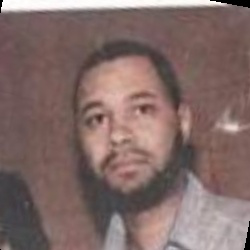

In [20]:
img

In [21]:
src = np.array([                                                                                                                                                                     
 [30.2946, 51.6963],                                                                                                                                                                
 [65.5318, 51.5014],                                                                                                                                                                
 [48.0252, 71.7366],                                                                                                                                                                
 [33.5493, 92.3655],                                                                                                                                                                
 [62.7299, 92.2041] ], dtype=np.float32 )

In [22]:
src[:,0] *= (img.size[0]/96)
src[:,1] *= (img.size[1]/112)

In [23]:
img.size

(250, 250)

In [24]:
src

array([[ 78.89219, 115.39353],
       [170.65573, 114.95849],
       [125.06563, 160.12634],
       [ 87.36797, 206.173  ],
       [163.35912, 205.81273]], dtype=float32)

In [25]:
bounding_boxes, landmarks = detect_faces(img)

In [26]:
dst = landmarks[0].astype(np.float32)

facial5points = [[dst[j],dst[j+5]] for j in range(5)]

from skimage import transform as trans
tform = trans.SimilarityTransform()    

                                                                                                                                              
tform.estimate(np.array(facial5points), src)

M = tform.params[0:2,:]

In [27]:
M

array([[   1.8907438 ,   -0.26974858,  -70.42343692],
       [   0.26974858,    1.8907438 , -134.11825467]])

In [28]:
warped = cv2.warpAffine(img_cv2,M,(img.size[0],img.size[1]), borderValue = 0.0)

In [29]:
warped.shape

(250, 250, 3)

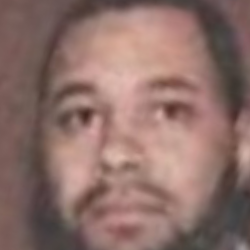

In [30]:
Image.fromarray(warped[...,::-1])

In [48]:
warped[...,::-1].shape

(250, 250, 3)

In [63]:
faces[0].size

(96, 112)

In [3]:
from tqdm import tqdm_notebook as tqdm
bounding_boxes, landmarks = detect_faces(img)
faces = []
img_cv2 = np.array(img)[...,::-1]
for i in tqdm(range(len(bounding_boxes))):
    box = bounding_boxes[i][:4].astype(np.int32).tolist()
    for idx, coord in enumerate(box[:2]):
        if coord > 1:
            box[idx] -= 1
    if box[2] + 1 < img_cv2.shape[1]:
        box[2] += 1
    if box[3] + 1 < img_cv2.shape[0]:
        box[3] += 1
    face = img_cv2[box[1]:box[3],box[0]:box[2]]
    landmark = landmarks[i]
    facial5points = [[landmark[j] - box[0],landmark[j+5] - box[1]] for j in range(5)]
    dst_img = warp_and_crop_face(face,facial5points)
    faces.append(Image.fromarray(dst_img[...,::-1]))

HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

/root/Notebooks/face/mtcnn-pytorch/src/matlab_cp2tform.py:90: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)
